In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [20]:
heart_raw = pd.read_csv("../Datasets/heart_disease_uci.csv")

y_full = heart_raw["num"].apply(lambda x: 1 if x > 0 else 0)

X_train = pd.read_csv("../Datasets/processed_heart_X_train.csv")
X_test  = pd.read_csv("../Datasets/processed_heart_X_test.csv")


In [21]:
_, _, y_train, y_test = train_test_split(
    heart_raw.drop(columns=["num"]),
    y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full
)

y_train = y_train.to_numpy()
y_test  = y_test.to_numpy()


In [22]:
imputer = SimpleImputer(strategy="median")

X_train = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns
)


In [23]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_linear_loss.py:333: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_linea

In [24]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [25]:
nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    max_iter=500,
    random_state=42
)

nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/extmath.py:227: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.fra

In [26]:
print(type(y_test))
print(len(y_test))
print(len(y_pred_log), len(y_pred_rf), len(y_pred_nn))


<class 'numpy.ndarray'>
184
184 184 184


In [27]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Neural Network"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_nn)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_nn)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_nn)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_nn)
    ]
})

results


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.820652,0.810811,0.882353,0.845070
1,Random Forest,0.842391,0.841121,0.882353,0.861244
2,Neural Network,0.842391,0.847619,0.872549,0.859903


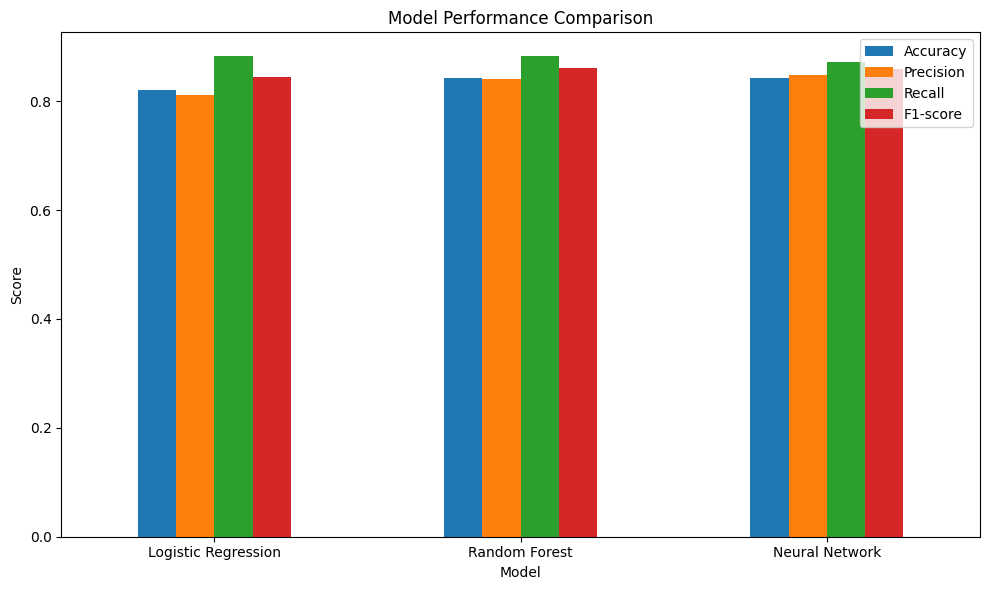

In [29]:
import matplotlib.pyplot as plt


results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar",
    figsize=(10, 6)
)

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig("../Results/model_comparison.pdf")
plt.show()


Among the evaluated models, Random Forest achieved the best overall performance, balancing accuracy, recall, and robustness. Logistic Regression provided interpretability, while the Neural Network demonstrated strong predictive capability at the cost of explainability